<a href="https://colab.research.google.com/github/no-way02/WIDS-IPL/blob/main/WEEK_3_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 3

##ML Model 01 - Winner prediction


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor,ElasticNet
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:

#Importing Libraries
import pandas as pd

#Reading data from CSV file
matches = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/matches.csv', error_bad_lines=False)

#reading file from drive
deliveries = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/deliveries.csv', error_bad_lines=False)


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

#Removing records having null values in "winner" column
matches=matches[matches["winner"].notna()]


In [ ]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:

#encoding the numeric values
encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,11,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,7,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,5,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,12,15,0,KM Jadhav,17,NaN,NaN,NaN


In [ ]:
#outcome variable team1_win as a probability of team1 winning the match
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
#dataframe of related features
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,13,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [ ]:
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)
# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

In [ ]:
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0,shuffle=True)


In [ ]:
y_test = y_test.values.reshape(-1,1)
y_test = y_test.flatten()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))


Accuracy of Logistic Regression Classifier on test set: 0.6159


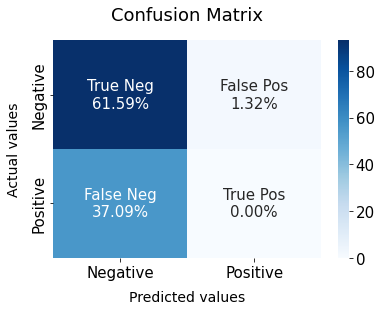

In [ ]:
ConfusionMatrix(y_pred, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76        95
           1       0.00      0.00      0.00        56

    accuracy                           0.62       151
   macro avg       0.31      0.49      0.38       151
weighted avg       0.39      0.62      0.48       151



In [ ]:

#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))




Accuracy of Decision Tree Classifier on test set: 0.6159


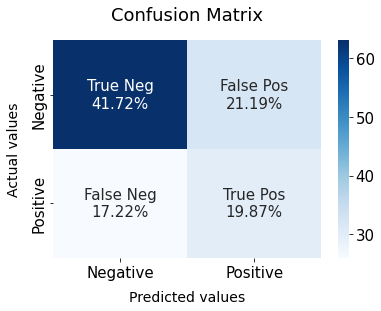

In [ ]:
ConfusionMatrix(y_pred, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68        95
           1       0.48      0.54      0.51        56

    accuracy                           0.62       151
   macro avg       0.60      0.60      0.60       151
weighted avg       0.62      0.62      0.62       151



In [ ]:


#SVM
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))



Accuracy of SVM Classifier on test set: 0.6623


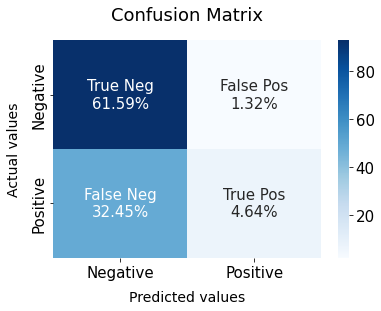

In [ ]:
ConfusionMatrix(y_pred, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78        95
           1       0.78      0.12      0.22        56

    accuracy                           0.66       151
   macro avg       0.72      0.55      0.50       151
weighted avg       0.70      0.66      0.57       151



In [ ]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Accuracy of Random Forest Classifier on test set: 0.5497


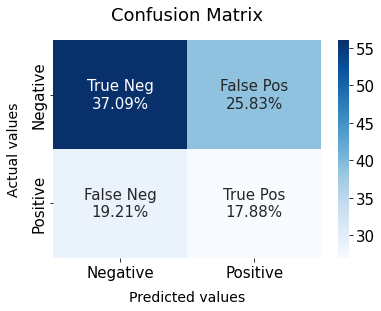

In [ ]:
ConfusionMatrix(y_pred, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        95
           1       0.41      0.48      0.44        56

    accuracy                           0.55       151
   macro avg       0.53      0.54      0.53       151
weighted avg       0.57      0.55      0.56       151



##ML Model 02 - Score prediction 

In [ ]:
#Reading data from CSV file
matches = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/matches.csv', error_bad_lines=False)

#reading file from drive
deliveries = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/deliveries.csv', error_bad_lines=False)


In [ ]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
        # else:
        #     print('p',y_pred[i]*300,y_test[i]*300)
    return (right)

In [ ]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
print(matches.shape)
matches.head()

(756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
print(deliveries.shape)
deliveries.head()

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


###DATA PREPROCESSING

In [ ]:
#Filing missing city name
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])


In [ ]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
#unique team names
print(matches['team1'].unique())
print(matches['team2'].nunique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
15


In [ ]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
matches['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)
matches['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)
matches['toss_winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)
matches['winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)

In [ ]:
#Dropping columns with missing winner values
# matches = matches[matches['winner'].notna()]

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # creating instance of labelencoder
# labelencoderTeam = LabelEncoder()
# # Assigning numerical values to teams and storing in another column 
# matches['team1'] = labelencoderTeam.fit_transform(matches['team1'])
# matches['team2'] = labelencoderTeam.fit_transform(matches['team2'])
# matches['toss_winner'] = labelencoderTeam.fit_transform(matches['toss_winner'])
# matches['winner'] = labelencoderTeam.fit_transform(matches['winner'])
# # Assigning numerical values to venues and storing in another column 
# labelencoderVenue = LabelEncoder()
# matches["venue"]=labelencoderVenue.fit_transform(matches["venue"])

In [ ]:
# # Saving label encoded values
# le_team_mapping = dict(zip(labelencoderTeam.classes_, labelencoderTeam.transform(labelencoderTeam.classes_)))
# print(le_team_mapping)

# le_venue_mapping = dict(zip(labelencoderVenue.classes_, labelencoderVenue.transform(labelencoderVenue.classes_)))
# print(le_venue_mapping)

In [ ]:
# #Colun umpire have most missing values
matches.drop(['umpire3'], axis = 1, inplace=True)

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


###Model

In [ ]:
data = pd.merge(left=matches, right=deliveries, left_on='id', right_on='match_id', how='right')
print(data.shape[0])


179078


In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
data['is_wicket'] = (~data['player_dismissed'].isnull()).astype('int')

In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_wicket
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0


In [ ]:
a1 = data['venue'].unique()
a2 = data['batting_team'].unique()
a3 = data['bowling_team'].unique()
a4 = data['batsman'].unique()
a5 = data['bowler'].unique()


In [ ]:
data['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
data = data[data['id'].notna()]

In [ ]:
data = data[data['winner'].notna()]

In [ ]:
def labelEncoding(data):
    dataset = pd.DataFrame(data)
    feature_dict ={}
      
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
              
    return dataset
  
labelEncoding(data)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_wicket
0,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,1,112,391,378,0,0,0,0,0,0,0,0,0,487,9,497,0
1,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,2,112,391,378,0,0,0,0,0,0,0,0,0,487,9,497,0
2,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,3,112,391,378,0,0,0,0,0,0,4,0,4,487,9,497,0
3,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,4,112,391,378,0,0,0,0,0,0,0,0,0,487,9,497,0
4,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,5,112,391,378,0,2,0,0,0,0,0,2,2,487,9,497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,15,38,8,0,8,0,0,0,8,1,0,85,29,38,23,11415,2,0,8,20,2,361,442,340,0,0,0,0,0,0,1,0,1,487,9,497,0
179074,11415,2019,15,38,8,0,8,0,0,0,8,1,0,85,29,38,23,11415,2,0,8,20,3,444,360,340,0,0,0,0,0,0,2,0,2,487,9,497,0
179075,11415,2019,15,38,8,0,8,0,0,0,8,1,0,85,29,38,23,11415,2,0,8,20,4,444,360,340,0,0,0,0,0,0,1,0,1,417,7,208,1
179076,11415,2019,15,38,8,0,8,0,0,0,8,1,0,85,29,38,23,11415,2,0,8,20,5,437,360,340,0,0,0,0,0,0,2,0,2,487,9,497,0


In [ ]:
data['innings'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()
list1 = data['innings'].unique()
(list1.shape)

(1498,)

In [ ]:
list1

array(['114', '113', '28', ..., '114140', '114158', '114150'],
      dtype=object)

In [ ]:
data2 = data.copy()
data2 = data2.groupby(by=['innings']).sum()['total_runs'].reset_index()
data2.head()

,innings,total_runs
0,1003,118
1,1005,94
2,10110,197
3,10113,132
4,1014,158


In [ ]:
data3 = pd.merge(left=data2, right=data, on='innings', how='right')
print(data3.shape)
data3.head()


(178706, 41)


,innings,total_runs_x,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,is_wicket
0,114,207,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,1,112,391,378,0,0,0,0,0,0,0,0,0,487,9,497,0
1,114,207,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,2,112,391,378,0,0,0,0,0,0,0,0,0,487,9,497,0
2,114,207,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,3,112,391,378,0,0,0,0,0,0,4,0,4,487,9,497,0
3,114,207,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,4,112,391,378,0,0,0,0,0,0,0,0,0,487,9,497,0
4,114,207,1,2017,15,469,13,12,12,1,0,0,13,35,0,224,28,6,34,1,1,14,13,1,5,112,391,378,0,2,0,0,0,0,0,2,2,487,9,497,0


In [ ]:
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data3.loc[data3['innings']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','total_runs_y','is_wicket','total_runs_x', 'venue', 'inning','batting_team',
             'bowling_team', 'batsman','bowler']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()

    one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
print(data3.shape)
print(container.shape)


(178706, 41)
(178706, 14)


In [ ]:
container['over'] = container['over'] + container['ball']/10

In [ ]:
container.head(20)


,over,ball,batsman_runs,total_runs_y,is_wicket,total_runs_x,venue,inning,batting_team,bowling_team,batsman,bowler,CUMSUM_runs,CUMSUM_wickets
0,1.1,1,0,0,0,207,28,1,14,13,112,378,0,0
1,1.2,2,0,0,0,207,28,1,14,13,112,378,0,0
2,1.3,3,4,4,0,207,28,1,14,13,112,378,4,0
3,1.4,4,0,0,0,207,28,1,14,13,112,378,4,0
4,1.5,5,0,2,0,207,28,1,14,13,112,378,6,0
5,1.6,6,0,0,0,207,28,1,14,13,392,378,6,0
6,1.7,7,0,1,0,207,28,1,14,13,392,378,7,0
7,2.1,1,1,1,0,207,28,1,14,13,392,2,8,0
8,2.2,2,4,4,0,207,28,1,14,13,112,2,12,0
9,2.3,3,0,1,0,207,28,1,14,13,112,2,13,0


In [ ]:
print(data3['venue'].unique())

[28 21 31 13 17  9 40  8 16 38 26 37 11 27 32 20  5 24 36  3 23  4 25  2
 30  1 39 12 22  6 33 15 35 34  7 18 10 19 29 14  0]


In [ ]:
container = container[:100000]
container.shape


(100000, 14)

In [ ]:
X =container[['venue', 'inning','batting_team',
             'bowling_team', 'batsman','bowler','CUMSUM_runs',
             'CUMSUM_wickets']].values
y = container['total_runs_x'].values
  

  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###GradBoost

In [ ]:
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
              #"n_estimators": [200,300],
              "learning_rate": [0.25,0.5,0.75],
              "max_depth": [10,14,18],           
             }         
gr_rf = GridSearchCV(GradientBoostingRegressor(),param_grid_rf,cv=5,verbose=2)
gr_rf.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  17.7s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  17.6s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  17.6s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  17.7s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  17.5s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  24.3s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  24.2s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  24.3s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  24.2s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  24.2s
[CV] END ...................learning_rate=0.25, max_depth=18; total time=  30.3s
[CV] END ...................learning_rate=0.25, m

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.25, 0.5, 0.75],
                         'max_depth': [10, 14, 18]},
             verbose=2)

In [ ]:
gr_rf.best_params_

{'learning_rate': 0.25, 'max_depth': 10}

In [ ]:
%%time
rf_best = GradientBoostingRegressor(random_state=300,
                                    n_estimators =5000,
                                    learning_rate=gr_rf.best_params_['learning_rate'],
                                    max_depth = gr_rf.best_params_['max_depth'],
                                    )
rf_best.fit(X_train,y_train)
y_pred = rf_best.predict(X_test)
score = rf_best.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred,10)))

R-squared value: 0.972 
Custom accuracy: 94.724 %
CPU times: user 18min 56s, sys: 1.64 s, total: 18min 58s
Wall time: 18min 52s


In [ ]:
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred,10)))

R-squared value: 0.972 
Custom accuracy: 94.724 %


[]

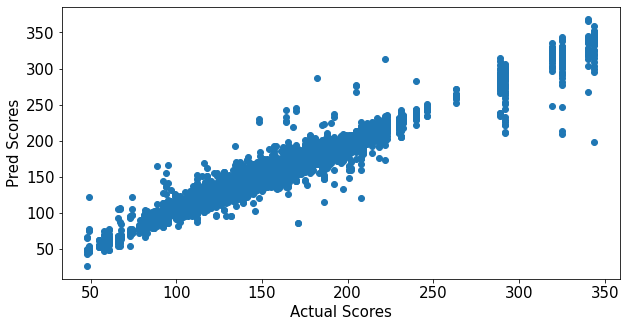

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

### Random Forest

In [ ]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_rf2 = {
              "n_estimators": [100,300,500],
              "max_depth": [10,50,100],           
             }         
gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5)
gr_rf2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 50, 100],
                         'n_estimators': [100, 300, 500]})

In [ ]:
gr_rf2.best_params_

{'max_depth': 100, 'n_estimators': 300}

In [ ]:
%%time
rf_best2 = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=gr_rf2.best_params_['n_estimators'],
                                    max_depth = gr_rf2.best_params_['max_depth'],
                                    )
rf_best2.fit(X_train,y_train)
y_pred = rf_best2.predict(X_test)
score = rf_best2.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred,10)))

R-squared value: 0.947 
Custom accuracy: 92.276 %
CPU times: user 1min 14s, sys: 208 ms, total: 1min 14s
Wall time: 1min 14s


[]

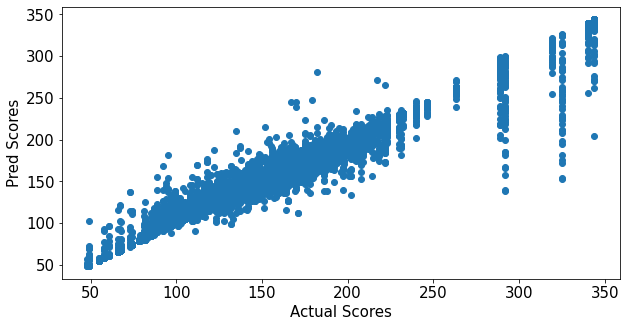

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

### Extra Trees

In [ ]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_ERT = {
              "n_estimators": [300,500,700],
              "max_depth": [30,60,120],
             }         
gr_ert = GridSearchCV(ExtraTreesRegressor(),param_grid_ERT,cv=5)
gr_ert.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [30, 60, 120],
                         'n_estimators': [300, 500, 700]})

In [ ]:
gr_ert.best_params_

{'max_depth': 120, 'n_estimators': 500}

In [ ]:
%%time
ERT_best = ExtraTreesRegressor(random_state=300,
                                    n_estimators=gr_ert.best_params_['n_estimators'],
                                    max_depth = gr_ert.best_params_['max_depth'],
                                    )
ERT_best.fit(X_train,y_train)
y_pred = ERT_best.predict(X_test)
score = ERT_best.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred,10)))

R-squared value: 0.962 
Custom accuracy: 94.112 %
CPU times: user 1min 11s, sys: 727 ms, total: 1min 11s
Wall time: 1min 11s


[]

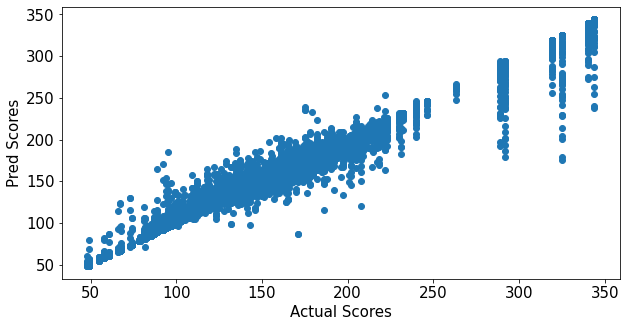

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()


1.   good accuracy with or without cumsum columns
2.   much more time in cumsum nmodel